# Turtle Soup

ДЛЯ ПОКУПКИ (ДЛЯ ПРОДАЖИ - НАОБОРОТ)
<ol>
<li>Сегодня должен быть сделан новый 20-дневный минимум — чем ниже, тем лучше.</li>
<li>Предыдущий 20-дневный минимум должен произойти по крайней мере на четыре
торговые сессии ранее. Это очень важно.</li>
<li>После того, как рынок упадет ниже <font color='#111a2e' style="background-color:#f7e98f;">предыдущего</font> 20-дневного минимума, разместите для
целей входа покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума.
Этот покупающий стоп годится только на сегодня.</li>
<li>Если покупающий стоп исполняется, немедленно ставьте первоначальный действующий-
до-отмены продающий стоп-лосс на один тик ниже сегодняшнего минимума.</li>
<li>Когда позиция становится прибыльной, используйте плавающий стоп, чтобы
предотвратить потерю прибыли. Некоторые из этих сделок будут длиться два-три часа, а
некоторые — несколько дней. Из-за волатильности и шума 20-дневных максимумов и
минимумов каждый рынок ведет себя по-своему.</li>
<li>Правило повторного входа: если на первый или второй день существования сделки у
вас сработал стоп, вы можете войти повторно с помощью покупающего стопа на
первоначальном уровне входа (только на первый или на второй день). Это должно
несколько увеличить вашу прибыль.</li>
</ol>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [5]:
def truncate(number):
    return math.floor(number * 10 ** 2) / 10 ** 2

In [6]:
spy_df = pd.read_csv('../../../data/SPY_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-12-23,378.206578,381.603617,376.592742,381.454193,59857300,0.0,0.0,0.0
2022-12-27,381.334651,381.693267,378.206574,379.949921,51638200,0.0,0.0,0.0
2022-12-28,379.880163,381.932359,374.988858,375.227936,70911500,0.0,0.0,0.0
2022-12-29,378.186666,382.888722,377.638738,381.982178,66970900,0.0,0.0,0.0
2022-12-30,379.192810,381.125406,376.991191,380.975983,84022200,0.0,0.0,0.0


In [7]:
spy_close = spy_df['Close'].to_frame()
spy_close

,Close
Date,
2002-01-02,77.189713
2002-01-03,78.064987
2002-01-04,78.586159
2002-01-07,78.031601
2002-01-08,77.851181
...,...
2022-12-23,381.454193
2022-12-27,379.949921
2022-12-28,375.227936


In [8]:
spy_close['Close'] = spy_close['Close'].apply(truncate)
spy_close

,Close
Date,
2002-01-02,77.18
2002-01-03,78.06
2002-01-04,78.58
2002-01-07,78.03
2002-01-08,77.85
...,...
2022-12-23,381.45
2022-12-27,379.94
2022-12-28,375.22


In [9]:
spy_close['20d_min'] = spy_close['Close'].rolling(window=20).min()
spy_close['20d_max'] = spy_close['Close'].rolling(window=20).max()
spy_close.dropna(inplace=True)
spy_close

,Close,20d_min,20d_max
Date,,,
2002-01-30,74.74,73.68,78.58
2002-01-31,75.61,73.68,78.58
2002-02-01,75.26,73.68,78.58
2002-02-04,73.39,73.39,78.03
2002-02-05,72.94,72.94,77.85
...,...,...,...
2022-12-23,381.45,378.57,404.27
2022-12-27,379.94,378.57,404.27
2022-12-28,375.22,375.22,404.27


In [10]:
t_points_max = spy_close[spy_close['Close'] == spy_close['20d_max']]
t_points_max

,Close,20d_min,20d_max
Date,,,
2002-03-01,75.99,72.17,75.99
2002-03-04,77.33,72.17,77.33
2002-03-06,78.00,72.17,78.00
2002-03-08,78.16,72.35,78.16
2002-03-11,78.33,72.35,78.33
...,...,...,...
2022-11-10,391.39,354.64,391.39
2022-11-11,395.18,362.35,395.18
2022-11-22,396.55,367.90,396.55


In [11]:
t_points_min = spy_close[spy_close['Close'] == spy_close['20d_min']]
t_points_min

,Close,20d_min,20d_max
Date,,,
2002-02-04,73.39,73.39,78.03
2002-02-05,72.94,72.94,77.85
2002-02-06,72.62,72.62,77.55
2002-02-07,72.17,72.17,77.55
2002-04-03,75.80,75.80,78.69
...,...,...,...
2022-10-12,353.58,353.58,385.30
2022-12-15,386.37,386.37,404.27
2022-12-16,381.81,381.81,404.27


In [12]:
spy_close['New Maximum'] = spy_close['Close'] == spy_close['20d_max']
spy_close

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-01-30,74.74,73.68,78.58,False
2002-01-31,75.61,73.68,78.58,False
2002-02-01,75.26,73.68,78.58,False
2002-02-04,73.39,73.39,78.03,False
2002-02-05,72.94,72.94,77.85,False
...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False
2022-12-27,379.94,378.57,404.27,False
2022-12-28,375.22,375.22,404.27,False


In [13]:
spy_close[spy_close['New Maximum'] == True]

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-03-01,75.99,72.17,75.99,True
2002-03-04,77.33,72.17,77.33,True
2002-03-06,78.00,72.17,78.00,True
2002-03-08,78.16,72.35,78.16,True
2002-03-11,78.33,72.35,78.33,True
...,...,...,...,...
2022-11-10,391.39,354.64,391.39,True
2022-11-11,395.18,362.35,395.18,True
2022-11-22,396.55,367.90,396.55,True


In [14]:
spy_close['New Minimum'] = spy_close['Close'] == spy_close['20d_min']
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.74,73.68,78.58,False,False
2002-01-31,75.61,73.68,78.58,False,False
2002-02-01,75.26,73.68,78.58,False,False
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False
2022-12-27,379.94,378.57,404.27,False,False
2022-12-28,375.22,375.22,404.27,False,True


In [15]:
spy_close[spy_close['New Minimum'] == True]

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
2002-02-06,72.62,72.62,77.55,False,True
2002-02-07,72.17,72.17,77.55,False,True
2002-04-03,75.80,75.80,78.69,False,True
...,...,...,...,...,...
2022-10-12,353.58,353.58,385.30,False,True
2022-12-15,386.37,386.37,404.27,False,True
2022-12-16,381.81,381.81,404.27,False,True


In [16]:
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.74,73.68,78.58,False,False
2002-01-31,75.61,73.68,78.58,False,False
2002-02-01,75.26,73.68,78.58,False,False
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False
2022-12-27,379.94,378.57,404.27,False,False
2022-12-28,375.22,375.22,404.27,False,True


In [17]:
spy_close_min = spy_close[spy_close['New Minimum'] == True]
spy_close_max = spy_close[spy_close['New Maximum'] == True]

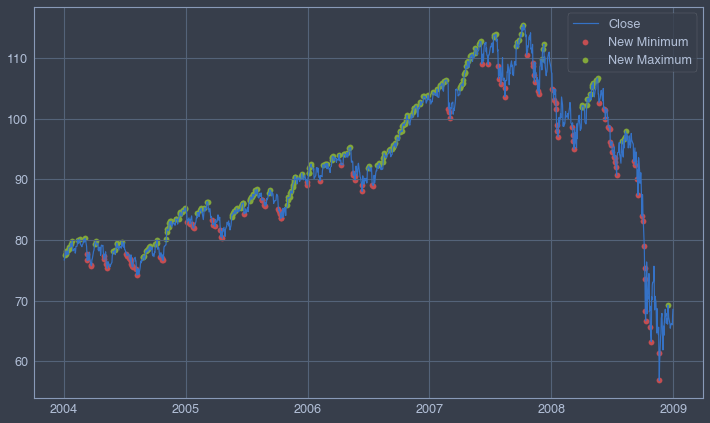

In [20]:
fig, ax = plt.subplots()
ax.plot(spy_close.loc['2004':'2008'].index, spy_close.loc['2004':'2008']['Close'], label='Close')
ax.scatter(spy_close_min.loc['2004':'2008'].index, spy_close_min.loc['2004':'2008']['Close'], label='New Minimum', c='r')
ax.scatter(spy_close_max.loc['2004':'2008'].index, spy_close_max.loc['2004':'2008']['Close'], label='New Maximum', c='g')
ax.grid(True)
plt.legend()

In [21]:
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
dr = pd.bdate_range(spy_close.index[50], periods=4, freq='B')[::-1]
dr

DatetimeIndex(['2002-04-17', '2002-04-16', '2002-04-15', '2002-04-12'], dtype='datetime64[ns]', freq='-1B')

In [22]:
row = spy_close.iloc[18]
spy_close.index.get_loc(row.name)

18

In [23]:
idx = spy_close.index.get_loc(spy_close.index[13])
spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']], spy_close.iloc[idx]

(Series([], Name: New Minimum, dtype: bool), Close          72.66
 20d_min        72.17
 20d_max        76.07
 New Maximum    False
 New Minimum    False
 Name: 2002-02-19 00:00:00, dtype: object)

In [24]:
len(spy_close.loc[dr]['New Minimum'][spy_close.loc[dr]['New Minimum']])

1

In [25]:
idx = spy_close.index.get_loc(spy_close.index[69])
l = len(spy_close.iloc[idx - 4: idx]['New Minimum'][spy_close.iloc[idx - 4: idx]['New Minimum']])
if not 0:
    print(1)
else:
    print(0)
l

1


2

In [26]:
# spy_position = spy_close.loc['2004':'2008'].copy()
spy_position = spy_close.copy()
spy_position

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.74,73.68,78.58,False,False
2002-01-31,75.61,73.68,78.58,False,False
2002-02-01,75.26,73.68,78.58,False,False
2002-02-04,73.39,73.39,78.03,False,True
2002-02-05,72.94,72.94,77.85,False,True
...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False
2022-12-27,379.94,378.57,404.27,False,False
2022-12-28,375.22,375.22,404.27,False,True


In [47]:
# Сегодня должен быть сделан новый 20-дневный минимум — чем ниже, тем лучше.
# 
# Предыдущий 20-дневный минимум должен произойти по крайней мере на четыре торговые сессии ранее.
# Это очень важно.
#
# После того, как рынок упадет ниже предыдущего 20-дневного минимума, разместите для целей входа
# покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума. Этот покупающий стоп годится
# только на сегодня.
#
# Если покупающий стоп исполняется, немедленно ставьте первоначальный действующий- до-отмены
# продающий стоп-лосс на один тик ниже сегодняшнего минимума.
#
# -------- X --------
# Когда позиция становится прибыльной, используйте плавающий стоп, чтобы предотвратить потерю прибыли.
# Некоторые из этих сделок будут длиться два-три часа, а некоторые — несколько дней. Из-за волатильности
# и шума 20-дневных максимумов и минимумов каждый рынок ведет себя по-своему.
# -------- X --------
# Правило повторного входа: если на первый или второй день существования сделки у вас сработал стоп,
# вы можете войти повторно с помощью покупающего стопа на первоначальном уровне входа
# (только на первый или на второй день). Это должно несколько увеличить вашу прибыль.

GET_TICKS = 3

BUY_ORDER = {
    'prepare'         : False,
    'order'           : False,
    'stop_loss'       : 0,
    'take_profit'     : 0,
    'order_level_buy' : 0
}

SELL_ORDER = {
    'prepare'         : False,
    'order'           : False,
    'stop_loss'       : 0,
    'take_profit'     : 0,
    'order_level_sell': 0
}

def turtle_soup(data):
    global BUY_ORDER
    
    if BUY_ORDER['prepare']:
        if not BUY_ORDER['order'] and BUY_ORDER['order_level_buy'] <= data['Close']:
            BUY_ORDER['order'] = True
            return 1
        if BUY_ORDER['order']:
            if BUY_ORDER['stop_loss'] >= data['Close'] or BUY_ORDER['take_profit'] <= data['Close']:
                BUY_ORDER['prepare']         = False
                BUY_ORDER['order']           = False
                BUY_ORDER['order_level_buy'] = 0
                BUY_ORDER['stop_loss']       = 0
                BUY_ORDER['take_profit']     = 0
                return 0
            return 1
    
    if SELL_ORDER['prepare']:
        if not SELL_ORDER['order'] and SELL_ORDER['order_level_sell'] >= data['Close']:
            SELL_ORDER['order'] = True
            return -1
        if SELL_ORDER['order']:
            if SELL_ORDER['stop_loss'] <= data['Close'] or SELL_ORDER['take_profit'] >= data['Close']:
                SELL_ORDER['prepare']          = False
                SELL_ORDER['order']            = False
                SELL_ORDER['order_level_sell'] = 0
                SELL_ORDER['stop_loss']        = 0
                SELL_ORDER['take_profit']      = 0
                return 0
            return -1
    
    if data['New Minimum']:
        if not BUY_ORDER['prepare']:
            idx = spy_position.index.get_loc(data.name)
            l = len(spy_position.iloc[idx - 4: idx]['New Minimum'][spy_position.iloc[idx - 4: idx]['New Minimum']])
            if not l:
                BUY_ORDER['prepare']         = True
                BUY_ORDER['order_level_buy'] = spy_position.iloc[idx-1]['20d_min'] + 0.05
                BUY_ORDER['stop_loss']       = spy_position.iloc[idx]['Close'] - 0.01
                BUY_ORDER['take_profit']     = spy_position.iloc[idx]['Close'] + GET_TICKS
                
    if data['New Maximum']:
        if not SELL_ORDER['prepare']:
            idx = spy_position.index.get_loc(data.name)
            l = len(spy_position.iloc[idx - 4: idx]['New Maximum'][spy_position.iloc[idx - 4: idx]['New Maximum']])
            if not l:
                SELL_ORDER['prepare']          = True
                SELL_ORDER['order_level_sell'] = spy_position.iloc[idx-1]['20d_max'] - 0.05
                SELL_ORDER['stop_loss']        = spy_position.iloc[idx]['Close'] + 0.01
                SELL_ORDER['take_profit']      = spy_position.iloc[idx]['Close'] - GET_TICKS
    return 0

In [48]:
spy_position['position'] = spy_position.apply(turtle_soup, axis=1)
spy_position.dropna(inplace=True)
spy_position

,Close,20d_min,20d_max,New Maximum,New Minimum,position,returnsb&h,strategy
Date,,,,,,,,
2002-02-01,75.26,73.68,78.58,False,False,0,-0.004640,-0.0
2002-02-04,73.39,73.39,78.03,False,True,0,-0.025161,-0.0
2002-02-05,72.94,72.94,77.85,False,True,0,-0.006151,-0.0
2002-02-06,72.62,72.62,77.55,False,True,0,-0.004397,-0.0
2002-02-07,72.17,72.17,77.55,False,True,0,-0.006216,-0.0
...,...,...,...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False,0,0.005731,0.0
2022-12-27,379.94,378.57,404.27,False,False,0,-0.003966,-0.0
2022-12-28,375.22,375.22,404.27,False,True,0,-0.012501,-0.0


In [49]:
spy_position[spy_position['position'] == 1]['Close'].count(), spy_position[spy_position['position'] == -1]['Close'].count()

(343, 52)

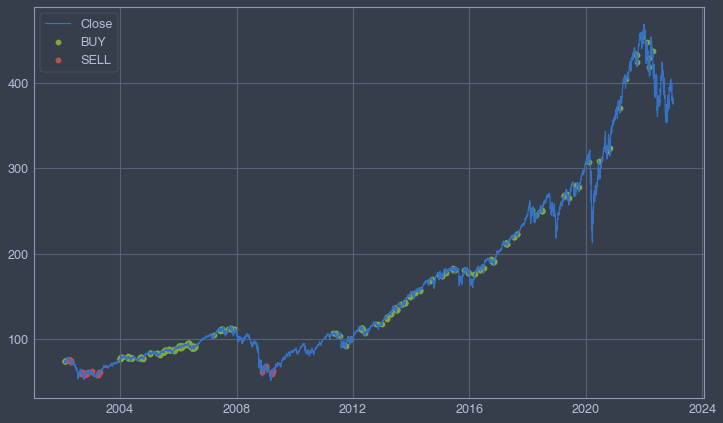

In [50]:
spy_buy_position = spy_position[spy_position['position'] == 1]
spy_sell_position = spy_position[spy_position['position'] == -1]
fig, ax = plt.subplots()
ax.plot(spy_position.index, spy_position['Close'], label='Close')
ax.scatter(spy_buy_position.index, spy_buy_position['Close'], label='BUY', c='g')
ax.scatter(spy_sell_position.index, spy_sell_position['Close'], label='SELL', c='r')
ax.grid(True)
plt.legend()

In [51]:
spy_position['returnsb&h'] = np.log(spy_position['Close'].div(spy_position['Close'].shift(1)))
spy_position['strategy'] = spy_position['returnsb&h'] * spy_position['position'].shift(1)
spy_position.dropna()

,Close,20d_min,20d_max,New Maximum,New Minimum,position,returnsb&h,strategy
Date,,,,,,,,
2002-02-04,73.39,73.39,78.03,False,True,0,-0.025161,-0.0
2002-02-05,72.94,72.94,77.85,False,True,0,-0.006151,-0.0
2002-02-06,72.62,72.62,77.55,False,True,0,-0.004397,-0.0
2002-02-07,72.17,72.17,77.55,False,True,0,-0.006216,-0.0
2002-02-08,73.55,72.17,76.93,False,False,0,0.018941,0.0
...,...,...,...,...,...,...,...,...
2022-12-23,381.45,378.57,404.27,False,False,0,0.005731,0.0
2022-12-27,379.94,378.57,404.27,False,False,0,-0.003966,-0.0
2022-12-28,375.22,375.22,404.27,False,True,0,-0.012501,-0.0


In [52]:
spy_position[['returnsb&h', 'strategy']].sum().apply(np.exp)

returnsb&h    5.062052
strategy      1.130037
dtype: float64

In [53]:
spy_position[['returnsb&h', 'strategy']].std() * np.sqrt(252)

returnsb&h    0.195594
strategy      0.044950
dtype: float64

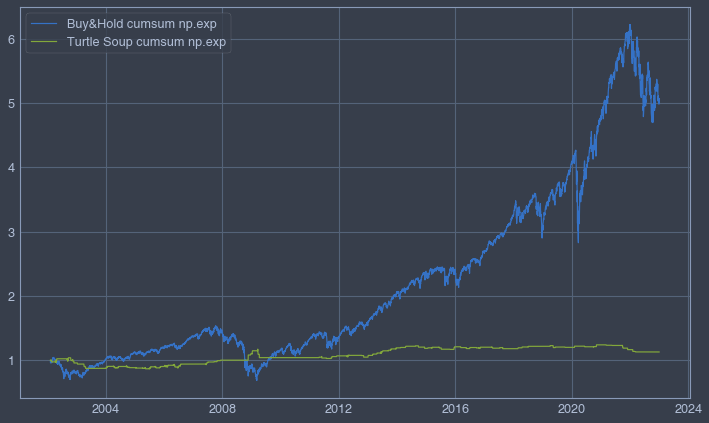

In [54]:
fig, ax = plt.subplots()
ax.plot(spy_position.index, spy_position['returnsb&h'].cumsum().apply(np.exp), label='Buy&Hold cumsum np.exp')
ax.plot(spy_position.index, spy_position['strategy'].cumsum().apply(np.exp), label='Turtle Soup cumsum np.exp')
plt.legend()

## Backtest Turtle Soup

In [36]:
class TurtleSoupBacktester():
#     def __init__(self, csv_file_name):
#         self.csv_file_name = csv_file_name
#         self.results = None
#         self.get_data()
    GET_TICKS = 3
    BUY_ORDER = {
        'prepare'         : False,
        'order'           : False,
        'stop_loss'       : 0,
        'take_profit'     : 0,
        'order_level_buy' : 0
    }
    SELL_ORDER = {
        'prepare'         : False,
        'order'           : False,
        'stop_loss'       : 0,
        'take_profit'     : 0,
        'order_level_sell': 0
    }
    
    def __init__(self, symbol, start, end):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    
    def truncate(self, number):
        return math.floor(number * 10 ** 2) / 10 ** 2
    
    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end)
        data = df.Close.to_frame()
        data['Close'] = data['Close'].apply(truncate)
        data['returns'] = np.log(data['Close'].div(data['Close'].shift(1)))
        data['20d_min'] = data['Close'].rolling(window=20).min()
        data['20d_max'] = data['Close'].rolling(window=20).max()
        data.dropna(inplace=True)
        data['New Maximum'] = data['Close'] == data['20d_max']
        data['New Minimum'] = data['Close'] == data['20d_min']
        self.data2 = data
        return data